In [378]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# INVARIANT DATA
p = 6963 #estimate from fullprof
M = 1.07797
S = 3.0/2.0
mu_0 = 4*np.pi*10**(-7)
k_B = 1.38064852*10**(-23)
mu_B = 9.274009994*10**(-24)
n = 3.0/(288.61*10**(-30))
r = 4.18*10**(-10) #Nd-Nd distance
g = 1.4 #why this g-factor?????
N_A = 6.02214085*10**(23)

#x0 = 4*np.pi*10**(-6)*(M/(m*H)) #SI molar susceptibility

plt.rcParams.update({'font.size': 13})
x = np.linspace(-1, 5., 200)

In [379]:
#POWDER 
m = 22.01*10**(-6)
H = 100
x0 = 4*np.pi*10**(-6)*(M/(m*H)) #SI molar susceptibility

Ge = np.genfromtxt('Nd3GeGa5O14_powder_MvT_100_Oe_FC.dc.idt',delimiter=',',skip_header=9)
temp = Ge[:,2]
susc = x0*Ge[:,3]
error = x0*Ge[:,4]
reg = Ge[:,5]
R = 0.985

GeFC = np.genfromtxt('Nd3GeGa5O14_powder_MvT_100_Oe_FC.dc.idt',delimiter=',',skip_header=9)
tempFC = GeFC[:,2]
suscFC = x0*GeFC[:,3]
errorFC = x0*GeFC[:,4]
regFC = GeFC[:,5]
R = 0.985

In [380]:
#CRYSTAL
m = 6.56*10**(-6)
H = 1000
x0 = 4*np.pi*10**(-6)*(M/(m*H)) #SI molar susceptibility

Ge_C = np.genfromtxt('Nd3GeGa5O14_MvsT_c_1000_Oe.dc.idt',delimiter=',',skip_header=9)
temp_C = Ge_C[:,2]
susc_C = x0*Ge_C[:,3]
error_C = x0*Ge_C[:,4]
reg_C = Ge_C[:,5]

Ge_AB = np.genfromtxt('Nd3GeGa5O14_MvsT_1000_Oe_ab_plane.dc.idt',delimiter=',',skip_header=9)
temp_AB = Ge_AB[:,2]
susc_AB = x0*Ge_AB[:,3]
error_AB = x0*Ge_AB[:,4]
reg_AB = Ge_AB[:,5]
R = 0.975

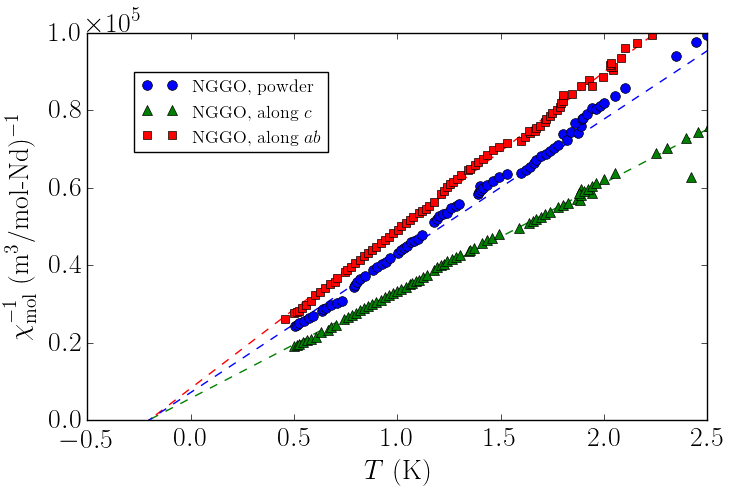

In [382]:
plt.rcParams.update({'font.size': 20})
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.plot(x, fit_C(x,C,D), 'g', linestyle='dashed') #C
plt.plot(x, fit_AB(x,A,B), 'r', linestyle='dashed') #AB
#plt.plot(x, P*x+Q, 'black', linestyle='dashed') #AB
plt.plot(x, 1/((2./(3.*fit_AB(x,A,B)))+(1./(3.*fit_C(x,C,D)))), 'blue', linestyle='dashed') #theoretical fit
plt.plot(temp[reg>R], 1/susc[reg>R], 'bo', label="NGGO, powder", markersize=7) #powder
plt.plot(temp_C[reg_C>R], 1/susc_C[reg_C>R], 'go', marker='^', label="NGGO, along $c$", markersize=7) #C
plt.plot(temp_AB[reg_AB>R], 1/susc_AB[reg_AB>R], 'ro', marker='s', label="NGGO, along $ab$", markersize=6) #AB
#plt.plot(x, fit_P(x,P,Q), 'b') #powder
plt.legend(bbox_to_anchor=(0.075, 0.9), fontsize=13, loc=2, borderaxespad=0.)
plt.xlabel("$T$ (K)")
plt.ylabel("$\\chi_\mathrm{mol}^{-1}$ (m$^3$/mol-Nd)$^{-1}$")
plt.rcParams["figure.figsize"] = [8,5]
axes = plt.gca()
axes.set_xlim([-0.5,2.5])
axes.set_ylim([0,100000])
#fig = plt.figure()

fig1 = plt.gcf()
plt.show()
plt.draw()
#fig1.savefig('NGGO_susceptibility.png')
fig1.savefig('NGGO_susceptibility.eps')
#plt.show()
#plt.close()

In [359]:
T_c = -D/C
mu_eff = np.sqrt(3*k_B/(A*N_A*mu_0*mu_B**2)) #easier calculation
#mu_eff = np.sqrt(3*k_B*p/(A*M*n*mu_0*mu_B**2)) #initial calculation
J_exch = 3*np.abs(T_c)/(2*S*(S+1))
Dee = mu_0*g**2*mu_B**2/(k_B*r**3)

print(T_c)
print(mu_eff)
print(0.5*np.sqrt(3*k_B/(N_A*mu_0*mu_B**2))*(a/A**(3./2)))
print(J_exch)
print(C,D)

-0.204960422344
3.94933753198
0.00807410602496
0.0819841689374
27764.1183294 5690.54541879


In [368]:
#fitting
q=3.0 #cutoff
T_AB = temp_AB[reg_AB>R]
S_AB = susc_AB[reg_AB>R]
def fit_AB(x,A,B):
    return A*x+B
p0 = [1,1]
popt, pcov = curve_fit(fit_AB, T_AB[T_AB<q], 1/S_AB[T_AB<q], p0)
perr = np.sqrt(np.diag(pcov))
a,b=perr
A,B=popt
ERR=(B/A)*np.sqrt((a/A)**2+(b/B)**2)

T_C = temp_C[reg_C>R]
S_C = susc_C[reg_C>R]
def fit_C(x,C,D):
    return C*x+D
p0 = [1,1]
popt, pcov = curve_fit(fit_C, T_C[T_C<q], 1/S_C[T_C<q], p0)
perr = np.sqrt(np.diag(pcov))
C,D=popt

q=4
T_P = temp[reg>R]
S_P = susc[reg>R]
def fit_P(x,P,Q):
    return P*x+Q
p0 = [1,1]
popt, pcov = curve_fit(fit_P, T_P[T_P<q], 1/S_P[T_P<q], p0)
perr = np.sqrt(np.diag(pcov))
P,Q=popt

print(B/A,ERR)
print(D/C)
print(Q/P)

0.2023261921 0.00671895609892
0.204960422344
0.205049726736


In [346]:
#fitting to diamagnetic
q = 2.6
T_AB = temp_AB[reg_AB>R]
S_AB = susc_AB[reg_AB>R]
def fitQ(x,CCC,DDD,FFF):
    return (x-DDD)/(CCC+FFF*(x-DDD))
p0 = [2e-5,-0.2,1e-6]
popt, pcov = curve_fit(fitQ, T_AB[T_AB<q], 1/S_AB[T_AB<q], p0)
perr = np.sqrt(np.diag(pcov))
CCC,DDD,FFF=popt

def fitR(x,CC,DD,FF):
    return (x-DD)/(CC+FF*(x-DD))
p0 = [2e-5,-0.2,1e-6]
popt, pcov = curve_fit(fitR, T_C[T_C<q], 1/S_C[T_C<q], p0)
perr = np.sqrt(np.diag(pcov))
CC,DD,FF=popt

print(DD,DDD)

-0.0982626241968 -0.13771986987


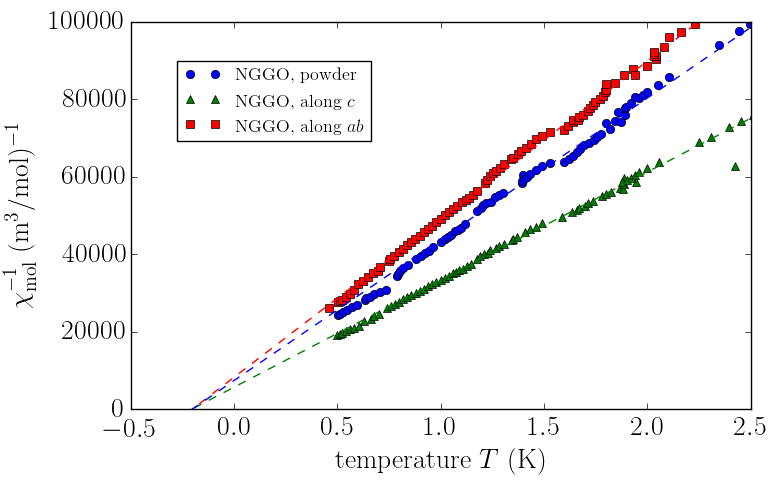

In [375]:
#plt.rcParams.update({'font.size': 14})
plt.plot(temp[reg>R], 1/susc[reg>R], 'bo', label="NGGO, powder") #powder
plt.plot(temp_C[reg_C>R], 1/susc_C[reg_C>R], 'go', marker='^', label="NGGO, along $c$") #C
plt.plot(temp_AB[reg_AB>R], 1/susc_AB[reg_AB>R], 'ro', marker='s', label="NGGO, along $ab$") #AB
plt.plot(x, fit_C(x,C,D), 'g', linestyle='dashed') #C
plt.plot(x, fit_AB(x,A,B), 'r', linestyle='dashed') #AB
#plt.plot(x, fit_P(x,P,Q), 'b') #powder
plt.legend(bbox_to_anchor=(0.075, 0.9), fontsize=13, loc=2, borderaxespad=0.)
plt.plot(x, (2./3.)*fit_AB(x,A,B)+(1./3.)*fit_C(x,C,D), 'blue', linestyle='dashed') #theoretical fit
plt.xlabel("temperature $T$ (K)")
plt.ylabel("$\\chi_\mathrm{mol}^{-1}$ (m$^3$/mol)$^{-1}$")
plt.rcParams["figure.figsize"] = [8,5]
axes = plt.gca()
axes.set_xlim([-0.5,2.5])
axes.set_ylim([0,100000])
#fig = plt.figure()

fig1 = plt.gcf()
fig1.savefig('NGGO_susceptibility.eps')
#plt.draw()
#plt.show()
#plt.close()